*目標 -> 分類預測: income 欄位為大於 50K 或小於等於 50K*

**載入資料集**

In [2]:
import pandas as pd

train_data_path = "./adult/adult.data"
test_data_path = "./adult/adult.test"

column_name = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
               'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

train_data_df = pd.read_csv(train_data_path, names = column_name)
test_data_df = pd.read_csv(test_data_path, names = column_name)

print("trian data shape: ", train_data_df.shape)
print("test data shape: ", test_data_df.shape)

#測試資料的第一row非資料內容，移除掉
print("Train features shape:", train_data_df.shape)
print("Test features shape:", test_data_df.shape)

test_data_df = test_data_df.drop(test_data_df.index[0])
test_data_df.reset_index(drop=True, inplace=True)
test_data_df

trian data shape:  (32561, 15)
test data shape:  (16282, 15)
Train features shape: (32561, 15)
Test features shape: (16282, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


**前處理**

In [3]:
# 移除字串前的空白 & 收入後方的.
train_data_df = train_data_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
test_data_df = test_data_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

train_data_df["income"] = train_data_df["income"].str.replace(".", "")
test_data_df["income"] = test_data_df["income"].str.replace(".", "")

print(train_data_df.info)
print(test_data_df.info)

# 檢查缺失值
print(train_data_df.isnull().sum()) # 檢查空值
print("-"*50)
# 檢查缺失值使用什麼替代
print("workclass值的內容:", train_data_df.workclass.unique())
print("\noccupation值的內容:", train_data_df.occupation.unique())
print("\nnative-country值的內容:", train_data_df.native_country.unique())
print("-"*50)

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education_num   
0       39         State-gov   77516   Bachelors             13  \
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital_status         occupation   relationship   race     sex   
0           Never-married       Adm-clerical  Not-in-family  White    Male  \
1      

In [4]:
# 缺失值使用"?", 確認數量
check_columns = ['workclass', 'occupation', 'native_country']
for check_c in check_columns:
    print("訓練資料", check_c, "中有缺失值的欄位:",train_data_df[check_c].isin(['?']).sum())
print("-"*50)
for check_c in check_columns:
    print("測試資料", check_c, "中有缺失值的欄位:",test_data_df[check_c].isin(['?']).sum())

訓練資料 workclass 中有缺失值的欄位: 1836
訓練資料 occupation 中有缺失值的欄位: 1843
訓練資料 native_country 中有缺失值的欄位: 583
--------------------------------------------------
測試資料 workclass 中有缺失值的欄位: 963
測試資料 occupation 中有缺失值的欄位: 966
測試資料 native_country 中有缺失值的欄位: 274


In [5]:
# 把具有缺失值的資料去除掉
train_data_df = train_data_df[(train_data_df.workclass != "?") & (train_data_df.occupation != "?") & (train_data_df.native_country != "?")]
test_data_df = test_data_df[(test_data_df.workclass != "?") & (test_data_df.occupation != "?") & (test_data_df.native_country != "?")]

print("train_data:", train_data_df.shape)
print("test_data:", test_data_df.shape)

print("-"*50)
for check_c in train_data_df.columns:
    print(check_c, "中有缺失值的欄位:",train_data_df[check_c].isin(['?']).sum())
print("-"*50)
for check_c in test_data_df.columns:
    print(check_c, "中有缺失值的欄位:",test_data_df[check_c].isin(['?']).sum())

train_data: (30162, 15)
test_data: (15060, 15)
--------------------------------------------------
age 中有缺失值的欄位: 0
workclass 中有缺失值的欄位: 0
fnlwgt 中有缺失值的欄位: 0
education 中有缺失值的欄位: 0
education_num 中有缺失值的欄位: 0
marital_status 中有缺失值的欄位: 0
occupation 中有缺失值的欄位: 0
relationship 中有缺失值的欄位: 0
race 中有缺失值的欄位: 0
sex 中有缺失值的欄位: 0
capital_gain 中有缺失值的欄位: 0
capital_loss 中有缺失值的欄位: 0
hours_per_week 中有缺失值的欄位: 0
native_country 中有缺失值的欄位: 0
income 中有缺失值的欄位: 0
--------------------------------------------------
age 中有缺失值的欄位: 0
workclass 中有缺失值的欄位: 0
fnlwgt 中有缺失值的欄位: 0
education 中有缺失值的欄位: 0
education_num 中有缺失值的欄位: 0
marital_status 中有缺失值的欄位: 0
occupation 中有缺失值的欄位: 0
relationship 中有缺失值的欄位: 0
race 中有缺失值的欄位: 0
sex 中有缺失值的欄位: 0
capital_gain 中有缺失值的欄位: 0
capital_loss 中有缺失值的欄位: 0
hours_per_week 中有缺失值的欄位: 0
native_country 中有缺失值的欄位: 0
income 中有缺失值的欄位: 0


In [6]:
# 檢查 education 以及 education_num 是否代表一樣的學歷, 若一樣則保留education_num即可

print("education值的內容:", train_data_df.education.unique())
print("education_num值的內容:", train_data_df.education_num.unique())

edu_level = train_data_df.education_num.unique()

for i in train_data_df.education_num.unique():
    print(train_data_df[train_data_df["education_num"] == i]["education"].unique(), i)

# 意義相同且數字大小與學歷高低有關, 去除掉 education :D
train_data_df = train_data_df.drop("education", axis=1)
test_data_df = test_data_df.drop("education", axis=1)
print(train_data_df.columns)
print(test_data_df.columns)

education值的內容: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
education_num值的內容: [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
['Bachelors'] 13
['HS-grad'] 9
['11th'] 7
['Masters'] 14
['9th'] 5
['Some-college'] 10
['Assoc-acdm'] 12
['7th-8th'] 4
['Doctorate'] 16
['Assoc-voc'] 11
['Prof-school'] 15
['5th-6th'] 3
['10th'] 6
['Preschool'] 1
['12th'] 8
['1st-4th'] 2
Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')
Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')


In [7]:
print("marital_status值的內容:", train_data_df.marital_status.unique())

# 參照 United States Census Bureau 轉換 marital_status 欄位
marital_replace_dice = {
    "Never-married": "Never-married",
    "Married-civ-spouse": "Married",
    "Divorced": "Divorced",
    "Married-spouse-absent": "Married",
    "Separated": "Separated",
    "Married-AF-spouse": "Married",
    "Widowed": "Widowed"
}

train_data_df["marital_status"] = train_data_df["marital_status"].replace(marital_replace_dice)
test_data_df["marital_status"] = test_data_df["marital_status"].replace(marital_replace_dice)

print("marital_status值的內容:", train_data_df.marital_status.unique())

# 參照 United States Census Bureau 轉換 workclass
workclass_replace_dict = {
    "State-gov": "Goverment",
    "Self-emp-not-inc": "Self-employed",
    "Private": "Private",
    "Federal-gov": "Goverment",
    "Local-gov": "Goverment",
    "Self-emp-inc": "Self-employed",
    "Without-pay": "Unpaid",
    "Never-worked": "Unpaid"
}

train_data_df["workclass"] = train_data_df["workclass"].replace(workclass_replace_dict)
test_data_df["workclass"] = test_data_df["workclass"].replace(workclass_replace_dict)

print("workclass值的內容:", train_data_df.workclass.unique())

marital_status值的內容: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
marital_status值的內容: ['Never-married' 'Married' 'Divorced' 'Separated' 'Widowed']
workclass值的內容: ['Goverment' 'Self-employed' 'Private' 'Unpaid']


In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

category_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race','native_country']
binary_columns = ['income', 'sex']

for col in binary_columns:
    train_data_df[col] = labelencoder.fit_transform(train_data_df[col])
    test_data_df[col] = labelencoder.transform(test_data_df[col])

# 使用pd.get_dummies()對多類別型特徵進行one-hot encoding
train_data_df = pd.get_dummies(train_data_df, columns=category_columns)
test_data_df = pd.get_dummies(test_data_df, columns=category_columns)

missing_columns = set(train_data_df.columns) - set(test_data_df.columns)
for col in missing_columns:
    test_data_df[col] = 0

print("Test features shape:", test_data_df.shape)

Test features shape: (15060, 83)


In [9]:
# 分離特徵跟預測目標

train_features = train_data_df.drop(columns=['income'])
train_target = train_data_df['income']

test_features = test_data_df.drop(columns=['income'])
test_target = test_data_df['income']

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)

Train features shape: (30162, 82)
Test features shape: (15060, 82)


In [10]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

# 篩選出不在binary_columns和category_columns中的特徵欄位
numerical_columns = [col for col in train_features.columns if col not in binary_columns + category_columns]

# 對這些特徵欄位進行正規化
standardscaler.fit(train_features[numerical_columns])
scaled_values_train = standardscaler.transform(train_features[numerical_columns])
train_features[numerical_columns] = scaled_values_train

scaled_values_test = standardscaler.transform(test_features[numerical_columns])
test_features[numerical_columns] = scaled_values_test

# 確保特徵欄位名稱不變
train_features.columns = train_features.columns
test_features.columns = test_features.columns

train_features

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,workclass_Goverment,workclass_Private,workclass_Self-employed,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.042796,-1.062722,1.128918,1,0.146092,-0.218586,-0.077734,2.456096,-1.682144,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
1,0.880288,-1.007871,1.128918,1,-0.147445,-0.218586,-2.331531,-0.407150,-1.682144,2.727938,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
2,-0.033340,0.244693,-0.439738,1,-0.147445,-0.218586,-0.077734,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
3,1.108695,0.425240,-1.224066,1,-0.147445,-0.218586,-0.077734,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
4,-0.794697,1.406658,1.128918,0,-0.147445,-0.218586,-0.077734,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,-3.216773,-0.046113,-0.023038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.870832,0.638972,0.736754,0,-0.147445,-0.218586,-0.244682,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
32557,0.118931,-0.335252,-0.439738,1,-0.147445,-0.218586,-0.077734,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
32558,1.489374,-0.358575,-0.439738,0,-0.147445,-0.218586,-0.077734,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
32559,-1.251511,0.110705,-0.439738,1,-0.147445,-0.218586,-1.747213,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038


**預處理結束，建立模型**

In [31]:
from keras import models
from keras import layers
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from numpy import argmax

model = models.Sequential([
    layers.Input(shape=(train_features.shape[1],)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_target, epochs=5, batch_size=32)
test_loss, test_acc = model.evaluate(test_features, test_target)

train_predict = model.predict(train_features)
prediction_label = (train_predict > 0.5).astype(int)

precision = precision_score(train_target, prediction_label, average="weighted", zero_division=1)
recall = recall_score(train_target, prediction_label, average="weighted", zero_division=1)
f1 = f1_score(train_target, prediction_label, average="weighted", zero_division=1)
print("-"*50)
print("訓練集績效:")
print('test acc:', test_acc)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score", f1)

Epoch 1/5
943/943 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - acc: 0.8259 - loss: 0.3762
Epoch 2/5
943/943 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - acc: 0.8497 - loss: 0.3258
Epoch 3/5
943/943 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - acc: 0.8520 - loss: 0.3167
Epoch 4/5
943/943 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - acc: 0.8491 - loss: 0.3210
Epoch 5/5
943/943 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - acc: 0.8533 - loss: 0.3149
471/471 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8466 - loss: 0.3384
943/943 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
--------------------------------------------------
訓練集績效:
test acc: 0.8495351672172546
Precision Score: 0.852254075182699
Recall Score: 0.8578675154167495
F1 Score 0.85121377420251


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
from keras import backend as K

prediction = model.predict(test_features)
prediction_label = (prediction > 0.5).astype(int)

precision = precision_score(test_target, prediction_label, average="weighted", zero_division=1)
recall = recall_score(test_target, prediction_label, average="weighted", zero_division=1)
f1 = f1_score(test_target, prediction_label, average="weighted", zero_division=1)

print("-"*50)
print("測試集績效:")
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score", f1)

K.clear_session()

471/471 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
--------------------------------------------------
測試集績效:
Precision Score: 0.8333423081830869
Recall Score: 0.8389774236387783
F1 Score 0.8351398068798052


**超參數實驗**

In [24]:
def create_model(input_size, layer_number, unites_number, activation, optimizer):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_size,)))
    for i in range(layer_number):
        model.add(layers.Dense(unites_number, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
    return model

layers_to_test = [1, 2, 3]
unites_number = [64, 128, 256, 512, 1024]
epochs_to_test = [5, 10, 20]
batch_size = [32, 64, 128, 256]

all_record = []

activation = 'relu'
optimizer = 'adam'
input_size = train_features.shape[1]

for lay in layers_to_test:
    for unit in unites_number:
        for epo in epochs_to_test:
            for bat in batch_size:
                test_model = create_model(input_size, lay, unit, activation, optimizer)
                history = test_model.fit(train_features, train_target, epochs=epo, batch_size=bat, verbose=2)
                test_loss, test_acc = test_model.evaluate(test_features, test_target)
                
                train_prediction = test_model.predict(train_features)
                train_prediction_label = (train_prediction > 0.5).astype(int)
        
                train_precision = precision_score(train_target, train_prediction_label, average="weighted", zero_division=1)
                train_recall = recall_score(train_target, train_prediction_label, average="weighted", zero_division=1)
                train_f1 = f1_score(train_target, train_prediction_label, average="weighted", zero_division=1)
                
                print("-"*50)
                print(f"隱藏層{lay}, 節點{unit}, epoch{epo}, batch{bat} 訓練集績效:")
                print("Precision Score:", train_precision)
                print("Recall Score:", train_recall)
                print("F1 Score", train_f1)

                test_prediction = test_model.predict(test_features)
                test_prediction_label = (test_prediction > 0.5).astype(int)
                
                test_precision = precision_score(test_target, test_prediction_label, average="weighted", zero_division=1)
                test_recall = recall_score(test_target, test_prediction_label, average="weighted", zero_division=1)
                test_f1 = f1_score(test_target, test_prediction_label, average="weighted", zero_division=1)
                
                print("-"*50)
                print(f"隱藏層{lay}, 節點{unit}, epoch{epo}, batch{bat} 測試集績效:")
                print("Precision Score:", test_precision)
                print("Recall Score:", test_recall)
                print("F1 Score", test_f1)

                current_result = {"layer": lay,
                                  "units": unit,
                                  "epochs": epo,
                                  "batch_size": bat,
                                  "activation": activation,
                                  "optimizer": optimizer,
                                  "train_precision": train_precision,
                                  "train_recall": train_recall,
                                  "train_f1": train_f1,
                                  "test_precision": test_precision,
                                  "test_recall": test_recall,
                                  "test_f1": test_f1
                                 }
                
                all_record.append(current_result)
                K.clear_session()
    print("="*50)
    print(f"Completed batch for layer {lay}")
    print("="*50)

Epoch 1/5
943/943 - 2s - 2ms/step - acc: 0.8232 - loss: 0.3749
Epoch 2/5
943/943 - 1s - 1ms/step - acc: 0.8472 - loss: 0.3262
Epoch 3/5
943/943 - 1s - 1ms/step - acc: 0.8501 - loss: 0.3199
Epoch 4/5
943/943 - 1s - 1ms/step - acc: 0.8525 - loss: 0.3165
Epoch 5/5
943/943 - 1s - 1ms/step - acc: 0.8524 - loss: 0.3147
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - acc: 0.8445 - loss: 0.3305
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
--------------------------------------------------
隱藏層1, 節點32, epoch5, batch32 訓練集績效:
Precision Score: 0.8517425877264136
Recall Score: 0.8550162456070552
F1 Score 0.8529722807721476
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
--------------------------------------------------
隱藏層1, 節點32, epoch5, batch32 測試集績效:
Precision Score: 0.842061022974889
Recall Score: 0.8460823373173971
F1 Score 0.8435595586579533
Epoch 1/5
472/472 - 1s - 3ms/step - acc: 0.8169 - loss: 0.3916
Epoch 2/5
472/472 - 1s - 1ms/step - acc: 0.8458 - loss: 0.3325
Epoch 3/5
472/472 - 1s - 1ms/step - acc:

In [50]:
print(all_record)

[{'layer': 1, 'units': 32, 'epochs': 5, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8517425877264136, 'train_recall': 0.8550162456070552, 'train_f1': 0.8529722807721476, 'test_precision': 0.842061022974889, 'test_recall': 0.8460823373173971, 'test_f1': 0.8435595586579533}, {'layer': 1, 'units': 32, 'epochs': 5, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8487632399742808, 'train_recall': 0.8539221537033354, 'train_f1': 0.84991295540389, 'test_precision': 0.8428031419997392, 'test_recall': 0.8482735723771581, 'test_f1': 0.844280477755422}, {'layer': 1, 'units': 32, 'epochs': 5, 'batch_size': 128, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8453413267932985, 'train_recall': 0.8498773290895829, 'train_f1': 0.8467797990748942, 'test_precision': 0.8378616567334289, 'test_recall': 0.8419654714475432, 'test_f1': 0.8394251516792591}, {'layer': 1, 'units': 32, 'epochs': 5, 'batch_size': 256, 'activat

In [35]:
record_data_forConvert = pd.DataFrame(all_record)
record_df = pd.DataFrame.from_records(record_data_forConvert)
record_df

,layer,units,epochs,batch_size,activation,optimizer,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
0,1,32,5,32,relu,adam,0.851743,0.855016,0.852972,0.842061,0.846082,0.843560
1,1,32,5,64,relu,adam,0.848763,0.853922,0.849913,0.842803,0.848274,0.844280
2,1,32,5,128,relu,adam,0.845341,0.849877,0.846780,0.837862,0.841965,0.839425
3,1,32,5,256,relu,adam,0.843865,0.849281,0.845186,0.839877,0.844688,0.841501
4,1,32,10,32,relu,adam,0.854066,0.858133,0.855308,0.843364,0.848008,0.844906
...,...,...,...,...,...,...,...,...,...,...,...,...
175,3,512,10,256,relu,adam,0.863396,0.866587,0.864464,0.841229,0.844422,0.842541
176,3,512,20,32,relu,adam,0.883779,0.886645,0.884310,0.837148,0.841368,0.838743
177,3,512,20,64,relu,adam,0.881628,0.884159,0.882381,0.840236,0.842895,0.841383
178,3,512,20,128,relu,adam,0.881770,0.884888,0.882152,0.833949,0.838911,0.835702


In [34]:
record_df.to_csv('./lab3.csv', index=False)

In [36]:
grouped = record_df.groupby('layer')

grouped_dfs = []

for layer, group in grouped:
    group_name = f"group_layer_{layer}"
    group_df = pd.DataFrame(group)
    grouped_dfs.append((group_name, group_df))

grouped_dfs

[('group_layer_1',
      layer  units  epochs  batch_size activation optimizer  train_precision   
  0       1     32       5          32       relu      adam         0.851743  \
  1       1     32       5          64       relu      adam         0.848763   
  2       1     32       5         128       relu      adam         0.845341   
  3       1     32       5         256       relu      adam         0.843865   
  4       1     32      10          32       relu      adam         0.854066   
  5       1     32      10          64       relu      adam         0.850212   
  6       1     32      10         128       relu      adam         0.850641   
  7       1     32      10         256       relu      adam         0.849475   
  8       1     32      20          32       relu      adam         0.854288   
  9       1     32      20          64       relu      adam         0.853848   
  10      1     32      20         128       relu      adam         0.854781   
  11      1     32   

In [43]:
group_name = 'group_layer_1'
group_df = next(df for name, df in grouped_dfs if name == group_name)
# print(group_df)

sorted_group_df = group_df[['layer', 'units', 'epochs', 'batch_size', 'train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1']]
sorted_group_df = sorted_group_df.sort_values(by=['test_precision', 'test_recall', 'test_f1'], ascending=[True, True, True])
sorted_group_df

,layer,units,epochs,batch_size,train_precision,train_recall,train_f1,test_precision,test_recall,test_f1
2,1,32,5,128,0.845341,0.849877,0.846780,0.837862,0.841965,0.839425
8,1,32,20,32,0.854288,0.859492,0.854826,0.838495,0.843958,0.840142
14,1,64,5,128,0.848401,0.853922,0.849302,0.839489,0.845352,0.841016
3,1,32,5,256,0.843865,0.849281,0.845186,0.839877,0.844688,0.841501
41,1,256,10,64,0.853643,0.858763,0.854402,0.840033,0.845817,0.841556
32,1,128,20,32,0.861086,0.864996,0.862138,0.840033,0.844356,0.841607
15,1,64,5,256,0.844846,0.850872,0.845575,0.840301,0.846082,0.841811
58,1,512,20,128,0.860368,0.864863,0.861124,0.840413,0.845684,0.842015
52,1,512,10,32,0.856633,0.861349,0.857512,0.840456,0.845551,0.842068
45,1,256,20,64,0.863369,0.866454,0.864432,0.840630,0.843958,0.841983


[{'layer': 2, 'units': 64, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8719661118671086, 'train_recall': 0.8738147337709701, 'train_f1': 0.8727257998656844, 'test_precision': 0.8415103284638353, 'test_recall': 0.8419654714475432, 'test_f1': 0.8417334265394627}]
[{'layer': 2, 'units': 128, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8775662517523545, 'train_recall': 0.8809097539950932, 'train_f1': 0.878045721510525, 'test_precision': 0.8354535422773165, 'test_recall': 0.8403054448871182, 'test_f1': 0.8371674609813267}]
[{'layer': 2, 'units': 256, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8826521655087646, 'train_recall': 0.8845898813076056, 'train_f1': 0.8833718050229996, 'test_precision': 0.8367206413212108, 'test_recall': 0.8381142098273573, 'test_f1': 0.8373755147992233}]
[{'layer': 2, 'units': 512, 'epochs': 20, 'batch_size': 3

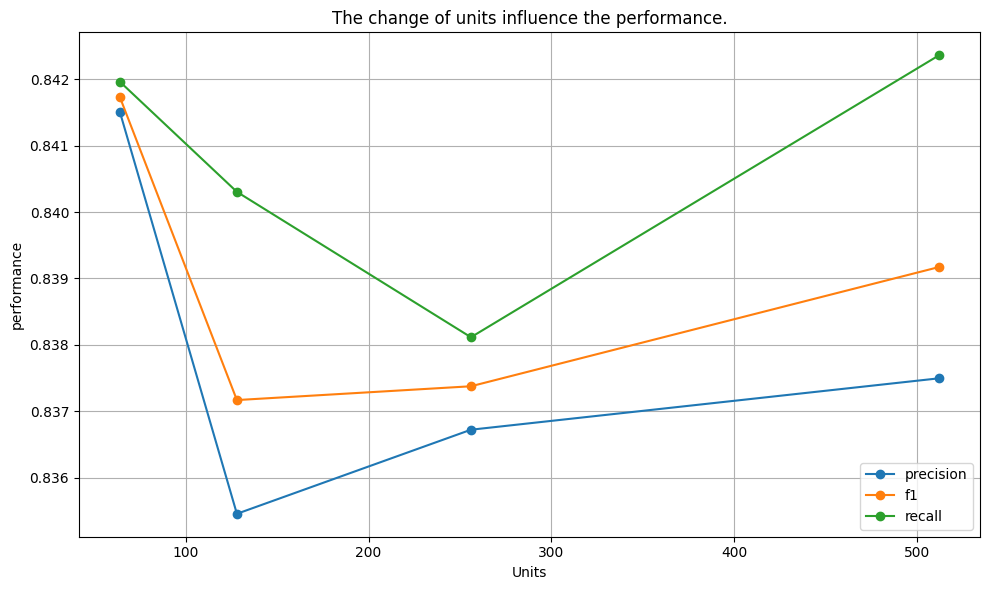

In [65]:
import matplotlib.pyplot as plt

layer_to_test = 2
epoch_to_test = 20
batch_size_to_test = 32

# 要看的項目變動，其他不動
unit_numbers = [64, 128, 256, 512]  
precision_scores = []
f1_scores = []
recall_score = []

for unit_num in unit_numbers:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == batch_size_to_test and
                        record["epochs"] == epoch_to_test and
                        record["units"] == unit_num and
                        record["layer"] == layer_to_test]
    print(filtered_records)
    precision_scores.append([record["test_precision"] for record in filtered_records][0])
    f1_scores.append([record["test_f1"] for record in filtered_records][0])
    recall_score.append([record["test_recall"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(unit_numbers, precision_scores, marker='o', label="precision")
plt.plot(unit_numbers, f1_scores, marker='o', label="f1")
plt.plot(unit_numbers, recall_score, marker='o', label="recall")


plt.xlabel('Units')
plt.ylabel('performance')
plt.title('The change of units influence the performance.')
plt.grid(True)
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

[{'layer': 2, 'units': 512, 'epochs': 5, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8506580715532955, 'train_recall': 0.8561766461110006, 'train_f1': 0.8480783668703505, 'test_precision': 0.8404985816620469, 'test_recall': 0.8476095617529881, 'test_f1': 0.8397466857443164}]
[{'layer': 2, 'units': 512, 'epochs': 10, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.863218101385101, 'train_recall': 0.867449108149327, 'train_f1': 0.8605423891778206, 'test_precision': 0.8406545589399287, 'test_recall': 0.847675962815405, 'test_f1': 0.8405990119413881}]
[{'layer': 2, 'units': 512, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8837666413663453, 'train_recall': 0.8868112194151582, 'train_f1': 0.8840330216872643, 'test_precision': 0.8374954377483081, 'test_recall': 0.8423638778220451, 'test_f1': 0.839172238223399}]


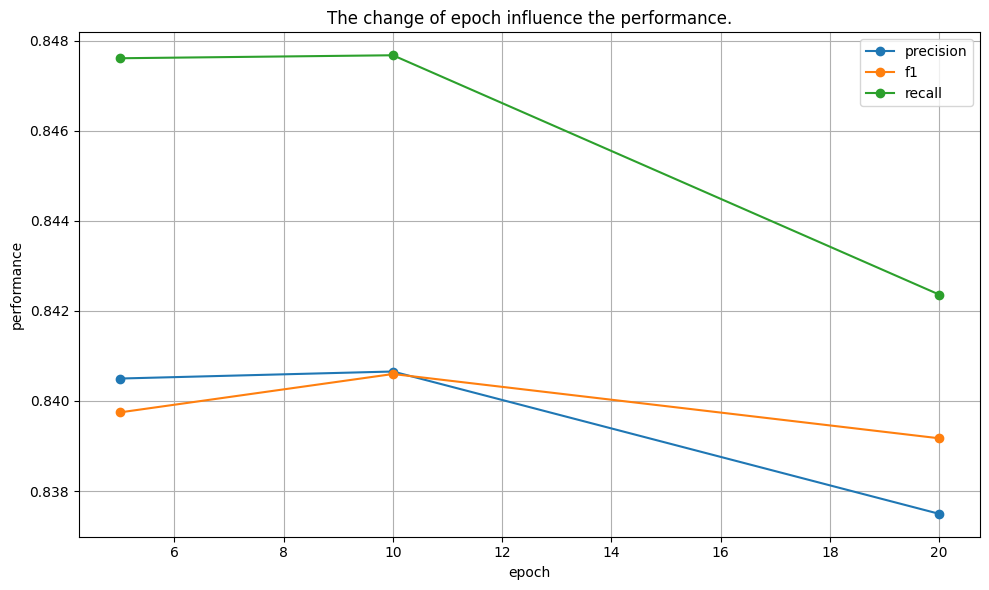

In [70]:
import matplotlib.pyplot as plt

layer_to_test = 2
epoch_to_test = [5, 10, 20]
batch_size_to_test = 32

# 要看的項目變動，其他不動
unit_numbers = 512  
precision_scores = []
f1_scores = []
recall_score = []

for epo in epoch_to_test:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == batch_size_to_test and
                        record["epochs"] == epo and
                        record["units"] == unit_numbers and
                        record["layer"] == layer_to_test]
    print(filtered_records)
    precision_scores.append([record["test_precision"] for record in filtered_records][0])
    f1_scores.append([record["test_f1"] for record in filtered_records][0])
    recall_score.append([record["test_recall"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(epoch_to_test, precision_scores, marker='o', label="precision")
plt.plot(epoch_to_test, f1_scores, marker='o', label="f1")
plt.plot(epoch_to_test, recall_score, marker='o', label="recall")


plt.xlabel('epoch')
plt.ylabel('performance')
plt.title('The change of epoch influence the performance.')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

[{'layer': 1, 'units': 512, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.866871121719028, 'train_recall': 0.8693389032557522, 'train_f1': 0.8678114316686402, 'test_precision': 0.841747281411029, 'test_recall': 0.8434926958831341, 'test_f1': 0.8425461434362673}]
[{'layer': 2, 'units': 512, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8837666413663453, 'train_recall': 0.8868112194151582, 'train_f1': 0.8840330216872643, 'test_precision': 0.8374954377483081, 'test_recall': 0.8423638778220451, 'test_f1': 0.839172238223399}]
[{'layer': 3, 'units': 512, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8837791058422544, 'train_recall': 0.8866454479145945, 'train_f1': 0.8843095979739787, 'test_precision': 0.8371484441908644, 'test_recall': 0.8413678618857902, 'test_f1': 0.8387426995239174}]


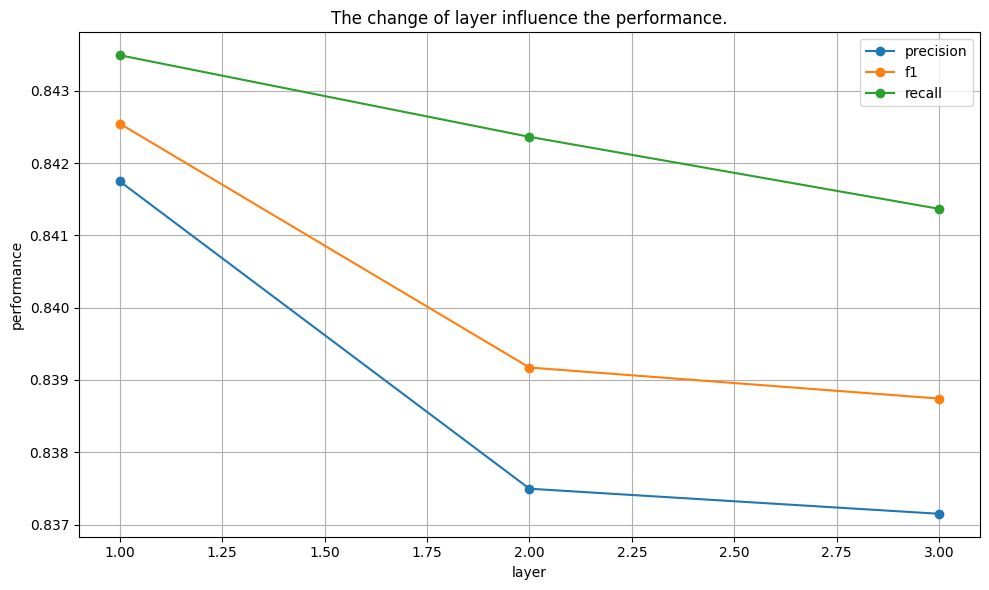

In [74]:
import matplotlib.pyplot as plt

layer_to_test = [1, 2, 3]
epoch_to_test = 20
batch_size_to_test = 32

# 要看的項目變動，其他不動
unit_numbers = 512  
precision_scores = []
f1_scores = []
recall_score = []

for lay in layer_to_test:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == batch_size_to_test and
                        record["epochs"] == epoch_to_test and
                        record["units"] == unit_numbers and
                        record["layer"] == lay]
    print(filtered_records)
    precision_scores.append([record["test_precision"] for record in filtered_records][0])
    f1_scores.append([record["test_f1"] for record in filtered_records][0])
    recall_score.append([record["test_recall"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(layer_to_test, precision_scores, marker='o', label="precision")
plt.plot(layer_to_test, f1_scores, marker='o', label="f1")
plt.plot(layer_to_test, recall_score, marker='o', label="recall")


plt.xlabel('layer')
plt.ylabel('performance')
plt.title('The change of layer influence the performance.')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

[{'layer': 2, 'units': 512, 'epochs': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8837666413663453, 'train_recall': 0.8868112194151582, 'train_f1': 0.8840330216872643, 'test_precision': 0.8374954377483081, 'test_recall': 0.8423638778220451, 'test_f1': 0.839172238223399}]
[{'layer': 2, 'units': 512, 'epochs': 20, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8822856630668207, 'train_recall': 0.8852861216099728, 'train_f1': 0.8827835544033757, 'test_precision': 0.8373523900118659, 'test_recall': 0.8420982735723772, 'test_f1': 0.8390211489195764}]
[{'layer': 2, 'units': 512, 'epochs': 20, 'batch_size': 128, 'activation': 'relu', 'optimizer': 'adam', 'train_precision': 0.8823929297720684, 'train_recall': 0.885020887209071, 'train_f1': 0.8831083792893121, 'test_precision': 0.8386326623472875, 'test_recall': 0.8426294820717132, 'test_f1': 0.8401659370052746}]
[{'layer': 2, 'units': 512, 'epochs': 20, 'batch_size': 

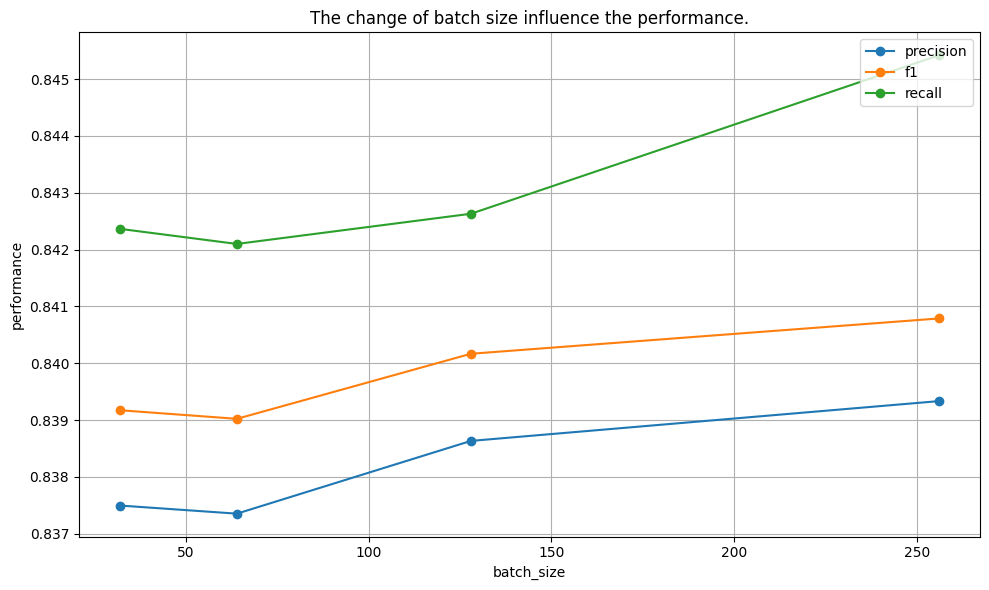

In [76]:
import matplotlib.pyplot as plt

layer_to_test = 2
epoch_to_test = 20
batch_size_to_test = [32, 64, 128, 256]

# 要看的項目變動，其他不動
unit_numbers = 512  
precision_scores = []
f1_scores = []
recall_score = []

for bat in batch_size_to_test:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == bat and
                        record["epochs"] == epoch_to_test and
                        record["units"] == unit_numbers and
                        record["layer"] == layer_to_test]
    print(filtered_records)
    precision_scores.append([record["test_precision"] for record in filtered_records][0])
    f1_scores.append([record["test_f1"] for record in filtered_records][0])
    recall_score.append([record["test_recall"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(batch_size_to_test, precision_scores, marker='o', label="precision")
plt.plot(batch_size_to_test, f1_scores, marker='o', label="f1")
plt.plot(batch_size_to_test, recall_score, marker='o', label="recall")


plt.xlabel('batch_size')
plt.ylabel('performance')
plt.title('The change of batch size influence the performance.')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()